# I. Setup 
- import statements, loading subject demographics, all functions for statistical analyses and figure generation

### A. Import Statements

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_ind
from statannot import add_stat_annotation

import warnings
warnings.filterwarnings('ignore')

### B. Load in gender and age info of each subject

In [2]:
# read in demographic info
gender_age_data = pd.read_csv('data/subject_demographics_595.txt',sep = '\t',names = ['subj_ID','age_months','gender'])
# display first 20 data values to check that read-in was successful
gender_age_data.head(5)

,subj_ID,age_months,gender
0,HCA6030645,544,F
1,HCA6031344,967,F
2,HCA6037457,880,F
3,HCA6051047,725,F
4,HCA6053758,437,F


### C. conn_vs_age_plot function:  
> displays visualization of connectivity values vs age linear regression for each subject by gender, where red indicates women and blue indicates men

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **y:** string variable stating the name of the ROI of interest
- **avg_or_peak:** string variable stating whether connectivity value inputs are "avg" or "peak" values from the VOI stats computation operation in BioImageSuite
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis

outputs:
- **figures** for linear regressions are saved into the directory specified within the function
- no variable outputs


In [3]:
def conn_vs_age_plot(df, y, avg_or_peak, icd_or_seed):
    sns.set(font_scale = 2)
    palette = sns.color_palette("bright")
    sns.set_style("white")
    
    # generate linear regression plots (with the y axis stretched by a factor of 2)
    linear_lmplot = sns.lmplot(data = df, x = 'age', y = y, hue = 'gender', palette = [palette[3],palette[0]], 
                               scatter_kws = {"alpha": 0.5}, line_kws={"alpha":1,"lw":7}, height=12, aspect=0.5, legend=False)
    
    plt.xticks([30,40,50,60,70,80,90,100])
    plt.ylabel("average ICD values")
    plt.title(y)
    plt.savefig("figures/lmplots/fig5_" + icd_or_seed + "_linear_" + y + ".png")
    return linear_lmplot

### D. conn_vs_age_quad_plot function:  
> displays visualization of connectivity values vs age quadratic regression for each subject by gender, where red indicates women and blue indicates men

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **y:** string variable stating the name of the ROI of interest
- **avg_or_peak:** string variable stating whether connectivity value inputs are "avg" or "peak" values from the VOI stats computation operation in BioImageSuite
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis

outputs:
- **figures** for quadratic regressions are saved into the directory specified within the function
- no variable outputs


In [4]:
def conn_vs_age_quad_plot(df, y, avg_or_peak, icd_or_seed):
    sns.set(font_scale = 2)
    palette = sns.color_palette("bright")
    sns.set_style("white")
    
    # generate linear regression plots (with the y axis stretched by a factor of 2)    
    quadratic_lmplot = sns.lmplot(data = df, x = 'age', y = y, hue = 'gender', palette = [palette[3],palette[0]], order = 2, 
                               scatter_kws = {"alpha": 0.5}, line_kws={"alpha":1,"lw":7}, height=12, aspect=0.5, legend=False)
    
    plt.xticks([30,40,50,60,70,80,90,100])
    plt.ylabel("average ICD values")
    plt.title(y)
    plt.savefig("figures/lmplots/supp_" + icd_or_seed + "_quadratic_" + y + ".png")
    return quadratic_lmplot

### E. get_linear_r_p function:  
> collects Pearson correlation (R) values and corresponding p values for linear fits for each gender in the input ROI

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **y:** string variable stating the name of the ROI of interest
- **avg_or_peak:** string variable stating whether connectivity value inputs are "avg" or "peak" values from the VOI stats computation operation in BioImageSuite
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis

outputs:
- **r_f:** R for female linear regression in input ROI
- **p_f:** p value for female linear regression in input ROI
- **r_m:** R for male linear regression in input ROI
- **p_m:** p value for male linear regression in input ROI

In [5]:
def get_linear_r_p(df, y, avg_or_peak, icd_or_seed):
    r_f, p_f = sp.stats.pearsonr(df[df['gender'] == 'F']['age'], df[df['gender'] == 'F'][y])
    r_m, p_m = sp.stats.pearsonr(df[df['gender'] == 'M']['age'], df[df['gender'] == 'M'][y])
    return r_f, p_f, r_m, p_m

### F. get_quad_r2 function:  
> collects R^2 values and corresponding p values for linear fits for each gender in the input ROI

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **y:** string variable stating the name of the ROI of interest
- **avg_or_peak:** string variable stating whether connectivity value inputs are "avg" or "peak" values from the VOI stats computation operation in BioImageSuite
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis

outputs:
- **r2_f:** R^2 for female linear regression in input ROI
- **r2_m:** R^2 for male linear regression in input ROI

In [6]:
def get_quad_r2(df, y, avg_or_peak, icd_or_seed):
    
    #define function to calculate r-squared
    def polyfit(x, y):
        coeffs = np.polyfit(x, y, 2)
        p = np.poly1d(coeffs)
        #calculate r-squared
        yhat = p(x)
        ybar = np.sum(y)/len(y)
        ssreg = np.sum((yhat-ybar)**2)
        sstot = np.sum((y - ybar)**2)
        r_squared = ssreg / sstot

        return r_squared

    #find r-squared of polynomial model with degree = 2 (quadratic)
    r2_f = polyfit(df[df['gender'] == 'F']['age'], df[df['gender'] == 'F'][y])
    r2_m = polyfit(df[df['gender'] == 'M']['age'], df[df['gender'] == 'M'][y])
    
    return r2_f, r2_m

### G. get_lin_data function:  

> collects linear fit correlation data for each gender in the input ROI; implements *get_linear_r_p* function

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **ROI:** string variable stating the name of the ROI of interest
- **ROI_num:** integer variable stating the number of the ROI of interest (corresponds with ROI number label in BIS objectmap)
- **avg_or_peak:** string variable stating whether connectivity value inputs are "avg" or "peak" values from the VOI stats computation operation in BioImageSuite
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis

outputs:
- **results:** pandas dataframe row holding the linear fit R and p values for each gender

In [7]:
def get_lin_data(df, ROI, ROI_num, avg_or_peak, icd_or_seed):
    lin_R_f, lin_p_f, lin_R_m, lin_p_m = get_linear_r_p(df, ROI, avg_or_peak, icd_or_seed)
    results = {'ROI_name':ROI, 'ROI_number':ROI_num,
               'linear_R_F':lin_R_f, 'linear_p_F':lin_p_f,
               'linear_R_M':lin_R_m, 'linear_p_M':lin_p_m}
    
    return results

### H. get_lin_quad_data function:  

> collects linear and quadratic fit correlation data for each gender in the input ROI; implements *get_linear_r_p* and *get_quad_r2* functions

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **ROI:** string variable stating the name of the ROI of interest
- **ROI_num:** integer variable stating the number of the ROI of interest (corresponds with ROI number label in BIS objectmap)
- **avg_or_peak:** string variable stating whether connectivity value inputs are "avg" or "peak" values from the VOI stats computation operation in BioImageSuite
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis

outputs:
- **results:** pandas dataframe row holding the linear fit R and p values and quadratic R^2 values for each gender

In [8]:
def get_lin_quad_data(data, ROI, ROI_num, avg_or_peak, icd_or_seed):
    lin_R_f, lin_p_f, lin_R_m, lin_p_m = get_linear_r_p(data, ROI, avg_or_peak, icd_or_seed)
    quad_R2_f, quad_R2_m = get_quad_r2(data, ROI, avg_or_peak, icd_or_seed)
    results = {'ROI_name':ROI, 'ROI_number':ROI_num,
               'linear_R_F':lin_R_f, 'linear_p_F':lin_p_f,
               'linear_R_M':lin_R_m, 'linear_p_M':lin_p_m,
               'quadratic_R2_F':quad_R2_f, 'quadratic_R2_M':quad_R2_m}
    
    return results

### I. conn_vs_age_boxplot function:  

> visualize connectivity data by decade comparing F vs M subjects for the input ROI; also displays mean of each group with green triangles and dashed lines connecting mean values across decades for each gender

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **y:** string variable stating the name of the ROI of interest
- **avg_or_peak:** string variable stating whether connectivity value inputs are "avg" or "peak" values from the VOI stats computation operation in BioImageSuite
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis
- **box_pair_list:** list of every comparison that the user wants displayed in the final figure (defined outside of this function, allows for exclusion of non-significant difference indicators)

outputs:
- **figures** of generated boxplots of women and men side by side, also shows the mean (as green triangles) on top of boxplots
- no variable outputs

In [9]:
def conn_vs_age_boxplot(df, y, icd_or_seed, box_pair_list):
    df["age groups"] = pd.cut(df["age"], bins = range(30, 101, 10))
    
    gender_list = sorted(df['gender'].unique())
    age_group_list = sorted(df['age groups'].unique())
    
    df_F = df[df['gender'] == 'F']
    df_M = df[df['gender'] == 'M']
    m_F = df_F.groupby('age groups')[y].mean()
    m_M = df_M.groupby('age groups')[y].mean()

    sns.set(font_scale = 4) # for main fig
    palette = sns.color_palette("bright")
    sns.set_style("whitegrid")
    fig = sns.boxplot(data = df, x = "age groups", y = y, hue = "gender", 
                      showmeans = True, 
                      meanprops={"markersize":"25"},
                      palette = [palette[3],palette[0]])
    fig.set_title(y)
    plt.ylabel("average ICD values")

    # documentation for add_stat_annotation: https://github.com/webermarcolivier/statannot/blob/master/example/example.ipynb
        # to remove the Bonferroni correction, add this parameter: comparisons_correction=None
        # to remove p-value annotation legend and other info: verbose = 0 (otherwise, verbose = 2)
    
    add_stat_annotation(fig, data=df, x = "age groups", y = y, hue = "gender", box_pairs=box_pair_list, 
                        test='t-test_ind', text_format='star', loc='inside', verbose=0)
    
    fig.plot([-0.2,.8,1.8,2.8,3.8,4.8,5.8],m_F.values,'r--', linewidth = 5)
    fig.plot([.2,1.2,2.2,3.2,4.2,5.2,6.2],m_M.values,'b--', linewidth = 5)
    
    lg = plt.legend(loc='upper left', bbox_to_anchor=(0.985, 1)).remove() # use .remove() at end of this line to get rid of legend
    
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)

    return fig

### J. ttest_age function:  

> perform t-test between female and male connectivity data by decade

inputs: 
- **df:** pandas dataframe containing columns for subject ID, age, gender, and columns for each ROI that connectivity values were collected for
- **y:** string variable stating the name of the ROI of interest
- **icd_or_seed:** string variable stating whether connectivity value inputs were derived from ICD or seed connectivity analysis

outputs:
- **ttest_values:** pandas dataframe row holding the age groups (decade), ROI names, t values, and corresponding p values

In [10]:
def ttest_age(df, y, icd_or_seed):

    # create dataframes in a dictionary for each decade
    d = {}
    keys = []
    for i in range(30,91,10):
        keys.append(str(i) + "-" + str(i + 10))
    age = 30
    for k in keys:
        d[k] = df[(df['age'] > age) & (df['age'] <= (age + 10))]
        age += 10

    # create dataframe to store all t and p values for each age group from t-test
    ttest_values = pd.DataFrame(columns = ['age groups', 'ROI', 't value', 'p value'])

    # populate t and p value dataframe
    age = 30
    for key, dataframe in d.items():
        age_str = str(age) + "-" + str(age + 10)
        t, p = ttest_ind(dataframe[dataframe['gender'] == 'F'][y], dataframe[dataframe['gender'] == 'M'][y])
        ttest_values = ttest_values.append({'age groups':age_str, 'ROI':y, 't value': t, 'p value': p}, ignore_index = True)
        age += 10
    # NOTE: 90_100 age group will have NaN for t and p values because there is only 1 man and 4 women in that age group
    
    return ttest_values

# II. Female-Male ICD analysis (using average ICD values)
- load in average ICD data, implement functions from "Setup" to run statistical analyses and generate figures

### A. Make list of ROIs of interest and their corresponding number labels

In [11]:
interest_ROIs = ["Left PCC", "Right PCC", "Left AG", "Right AG", "Left PHG", "Right PHG", "Left mPFC", "Right mPFC"]
general_ROIs = ["PCC", "AG", "PHG", "mPFC"]
interest_ROI_nums = [20, 17, 21, 18, 5, 6, 11, 10]

### B. Load in Female-Male average ICD values

In [12]:
# read in average ICD values derived from VOI Stats computation operation in BioImageSuite
icd_avg_data = pd.read_csv('data/ROI_FemaleMinusMale_DMNicdrestavg_alpha_n595_clust104p001_suyeonVOI_FULL.txt',sep = '\t',skip_blank_lines = True,skiprows = [1])
# display first 5 data values to check that read-in was successful
icd_avg_data.head(5)
# list all column names
# list(icd_avg_data.columns) 

,#Subj ID,Image Name,Task,R_lateraltemporal_medial_ROI1,L_lateraltemporal_ROI2,R_lateraltemporal_ROI3,L_lateraltemporal_medial_ROI4,L_mesialtemporal_ROI5,R_mesialtemporal_ROI6,L_frontal_ROI7,...,R_parietaloccipital_ROI16,R_PCCprecuneus_ROI17,R_angulargyrus_ROI18,L_parietaloccipital_ROI19,L_PCCprecuneus_ROI20,L_angulargyrus_ROI21,VOI 22,midline_PCCprecuneus_ROI23,L_parietal_ROI24,R_frontal_ROI25
0,HCA6030645,Common_HCA6030645_restavg_bis_icd_1_sqr_Both_...,Alpha,0.0309,0.0612,0.0581,0.0200,0.0387,0.0556,0.0139,...,0.0606,0.0272,0.0418,0.0387,0.0476,0.0434,0.0289,0.0771,0.0254,0.0482
1,HCA6031344,Common_HCA6031344_restavg_bis_icd_1_sqr_Both_...,Alpha,0.0455,0.0382,0.0326,0.0397,0.0318,0.0180,0.0526,...,0.0552,0.0398,0.0321,0.0585,0.0518,0.0393,0.0630,0.0861,0.0514,0.0265
2,HCA6037457,Common_HCA6037457_restavg_bis_icd_1_sqr_Both_...,Alpha,0.0234,0.0487,0.0562,0.0278,0.0248,0.0318,0.0439,...,0.0504,0.0410,0.0220,0.0598,0.0473,0.0095,0.0136,0.0744,0.0420,0.0261
3,HCA6051047,Common_HCA6051047_restavg_bis_icd_1_sqr_Both_...,Alpha,0.0436,0.0444,0.0517,0.0295,0.0473,0.0241,0.0253,...,0.0230,0.0422,0.0638,0.0277,0.0501,0.0567,0.0660,0.0850,0.0516,0.0454
4,HCA6053758,Common_HCA6053758_restavg_bis_icd_1_sqr_Both_...,Alpha,0.0476,0.0387,0.0325,0.0452,0.0382,0.0314,0.0200,...,0.0553,0.0359,0.0393,0.0456,0.0438,0.0370,0.0991,0.0584,0.0353,0.0467


### C. Make new dataframe with only necessary data from both read-in datasets

In [13]:
# create empty dataframe with necessary column names
master_data_avg_icd = pd.DataFrame(columns = ['subj_id','gender','age',
                                              "Left PCC", "Right PCC", "Left AG", "Right AG",
                                              "Left PHG", "Right PHG", "Left mPFC", "Right mPFC"])

# add rows to dataframe (use exact column names from last code block)
master_data_avg_icd['subj_id'] = gender_age_data['subj_ID']
master_data_avg_icd['gender'] = gender_age_data['gender']
master_data_avg_icd['age'] = gender_age_data['age_months']/12

select_cols = [' L_PCCprecuneus_ROI20  ',' R_PCCprecuneus_ROI17  ',
               ' L_angulargyrus_ROI21  ',' R_angulargyrus_ROI18  ',
               ' L_mesialtemporal_ROI5  ',' R_mesialtemporal_ROI6  ',
               ' L_frontal_ROI11  ',' R_frontal_ROI10  ']

for i in range(len(interest_ROIs)):
    master_data_avg_icd[interest_ROIs[i]] = icd_avg_data[select_cols[i]]
    
# display first 5 data values to check that dataframe was successfully generated
master_data_avg_icd.head(5)

,subj_id,gender,age,Left PCC,Right PCC,Left AG,Right AG,Left PHG,Right PHG,Left mPFC,Right mPFC
0,HCA6030645,F,45.333333,0.0476,0.0272,0.0434,0.0418,0.0387,0.0556,0.0607,0.0754
1,HCA6031344,F,80.583333,0.0518,0.0398,0.0393,0.0321,0.0318,0.0180,0.0420,0.0828
2,HCA6037457,F,73.333333,0.0473,0.0410,0.0095,0.0220,0.0248,0.0318,0.0582,0.0625
3,HCA6051047,F,60.416667,0.0501,0.0422,0.0567,0.0638,0.0473,0.0241,0.0600,0.0913
4,HCA6053758,F,36.416667,0.0438,0.0359,0.0370,0.0393,0.0382,0.0314,0.0371,0.0802


### D. Plot the linear regressions for average ICD values vs. age with gender labels for each ROI of interest

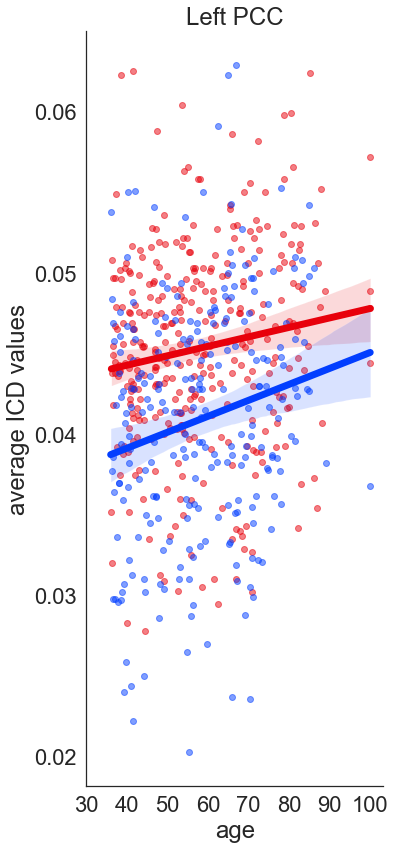

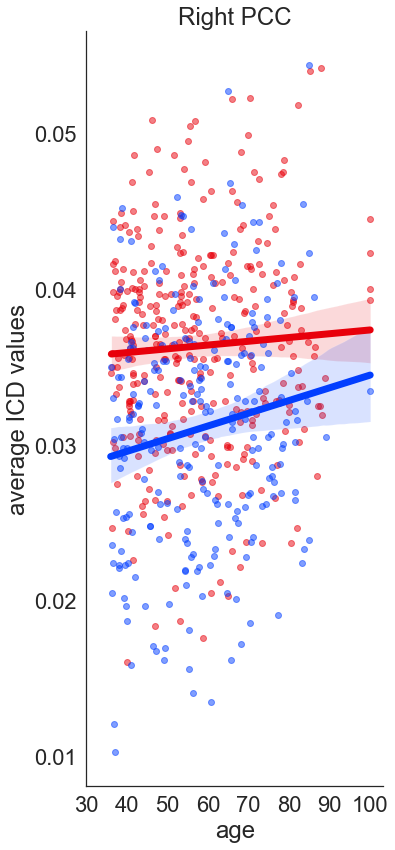

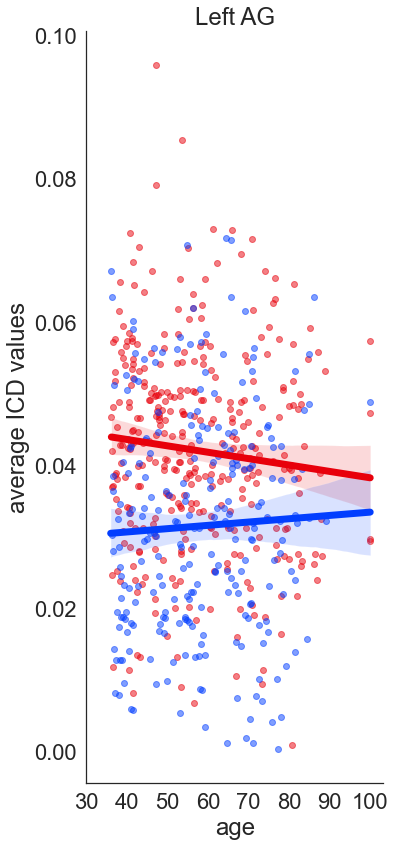

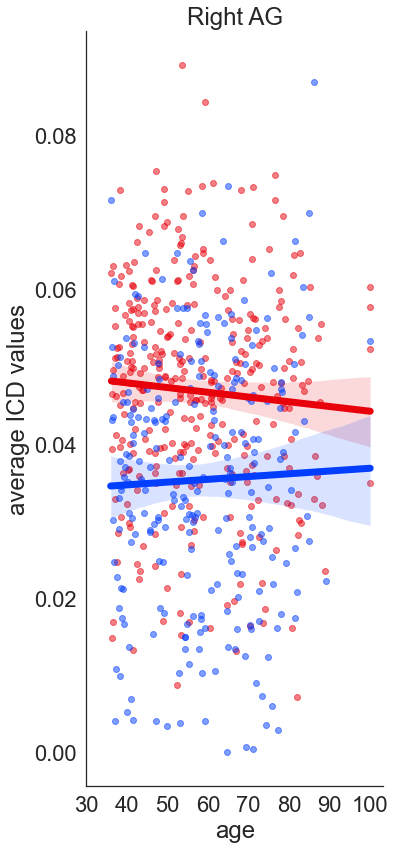

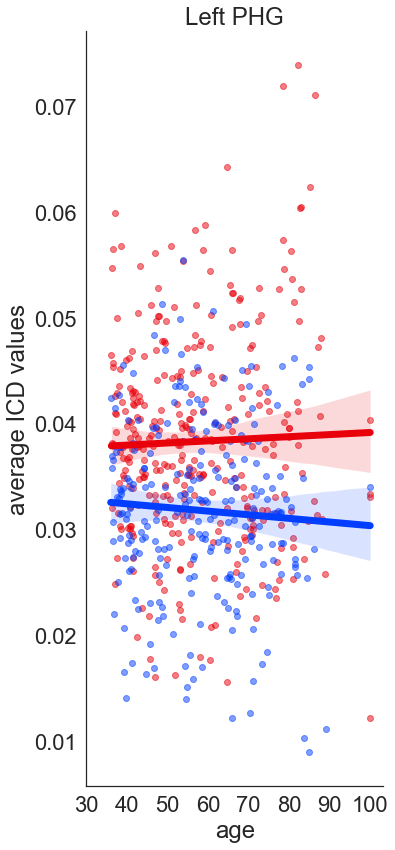

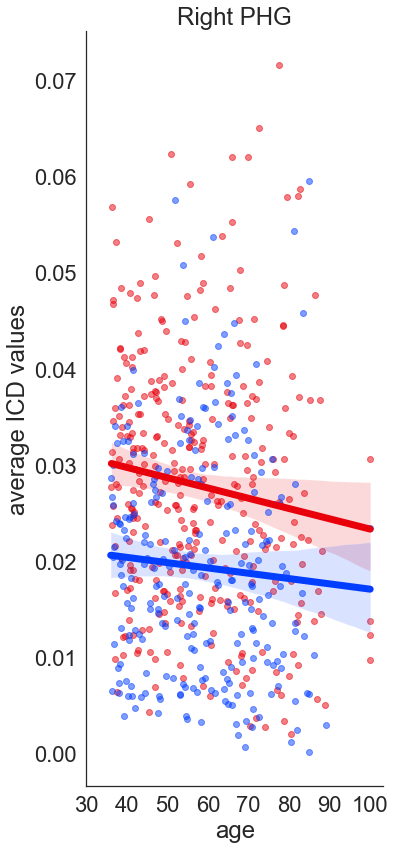

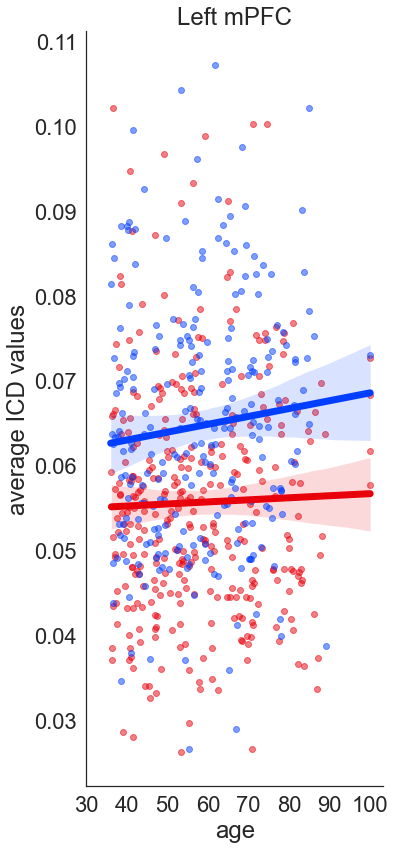

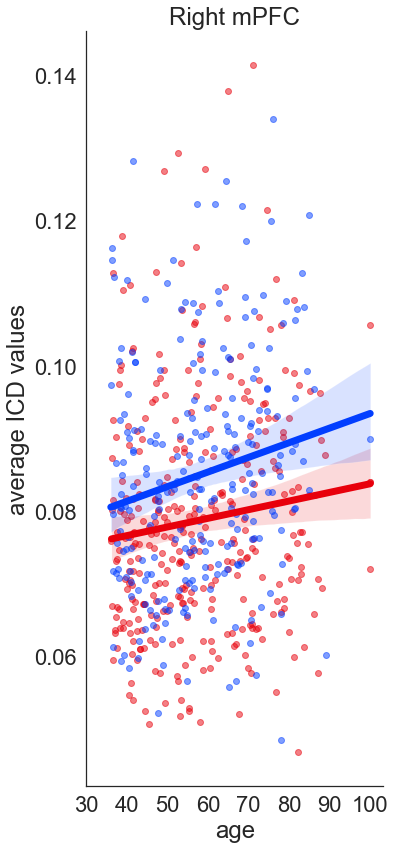

In [14]:
for i in interest_ROIs:
    conn_vs_age_plot(master_data_avg_icd, i, "avg", "icd")

### E. Get linear regression correlation info (R and p values) for each gender in each ROI

In [15]:
# create empty dataframe to store all linear and quadratic fits
lin_fits_icd = pd.DataFrame(columns = ['ROI_name', 'ROI_number', 
                                            'linear_R_F', 'linear_p_F','linear_R_M', 'linear_p_M'])

# fill dataframe with linear r and corresponding p values for all ROIs
for i in range(len(interest_ROIs)):
    lin_fits_icd = lin_fits_icd.append(get_lin_data(master_data_avg_icd, interest_ROIs[i], interest_ROI_nums[i], "avg", "icd"), ignore_index = True)

print(lin_fits_icd)

     ROI_name ROI_number  linear_R_F  linear_p_F  linear_R_M  linear_p_M
0    Left PCC         20    0.137991    0.010176    0.186548    0.003128
1   Right PCC         17    0.053287    0.323004    0.149391    0.018337
2     Left AG         21   -0.092777    0.084847    0.041480    0.514706
3    Right AG         18   -0.065074    0.227301    0.030436    0.632671
4    Left PHG          5    0.030377    0.573340   -0.058063    0.361570
5   Right PHG          6   -0.121930    0.023312   -0.066134    0.298586
6   Left mPFC         11    0.026363    0.625061    0.090614    0.153984
7  Right mPFC         10    0.111360    0.038418    0.178367    0.004756


### F. Plot the quadratic regressions for average ICD values vs. age with gender labels for each ROI of interest

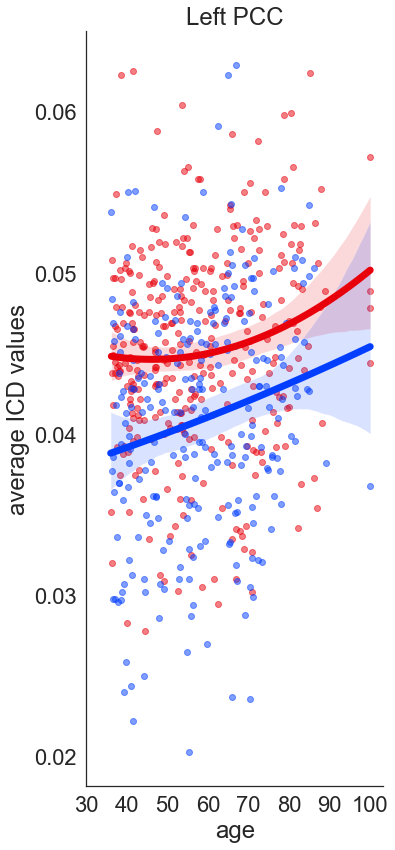

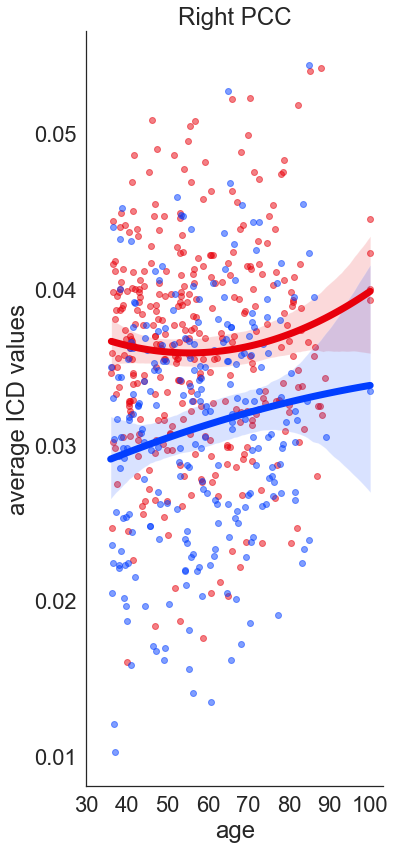

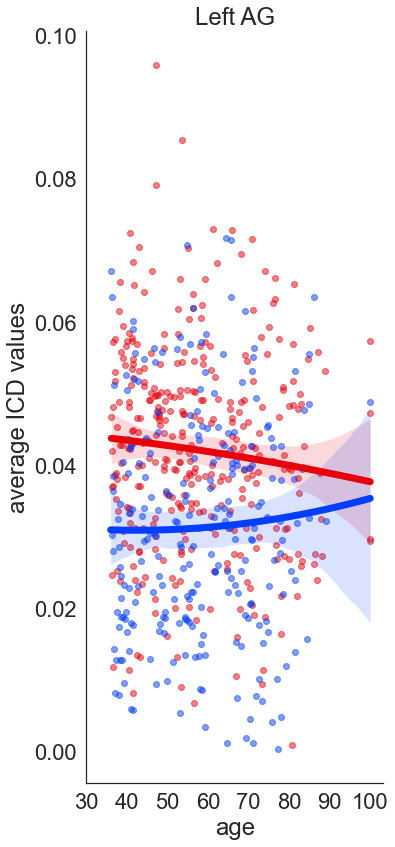

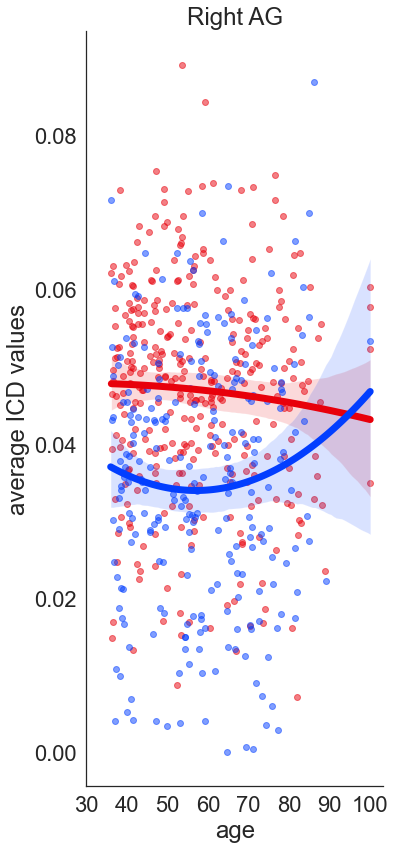

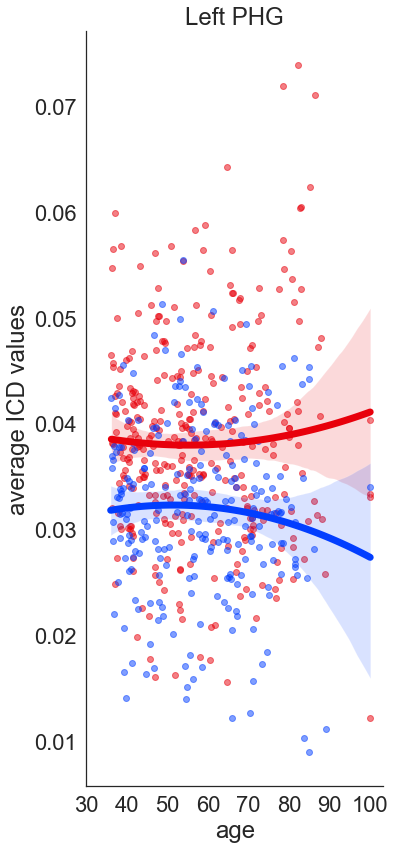

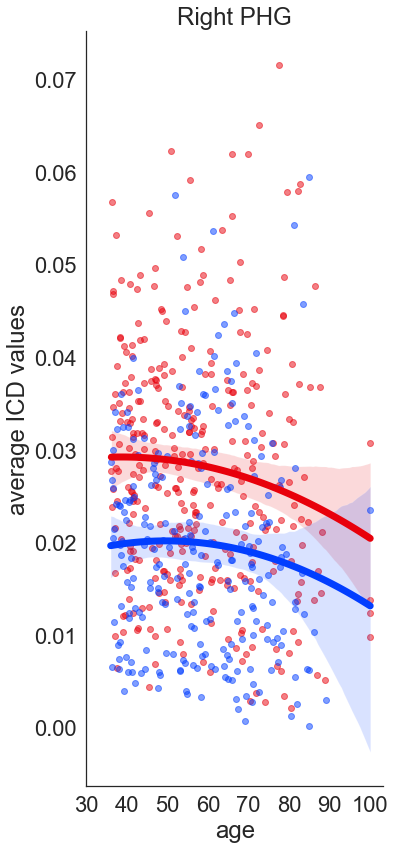

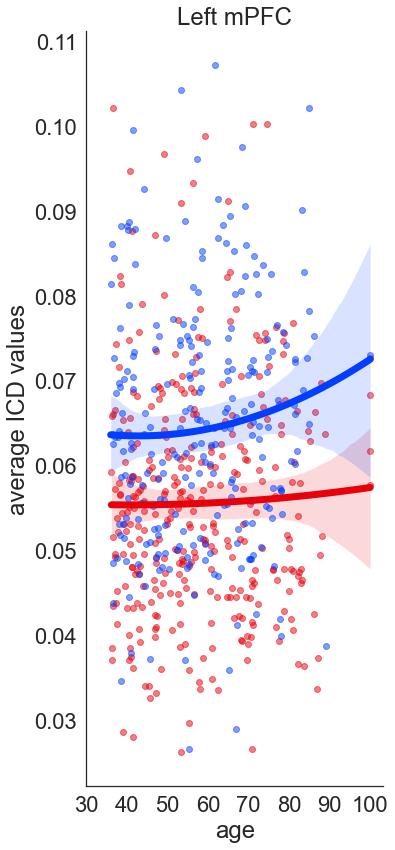

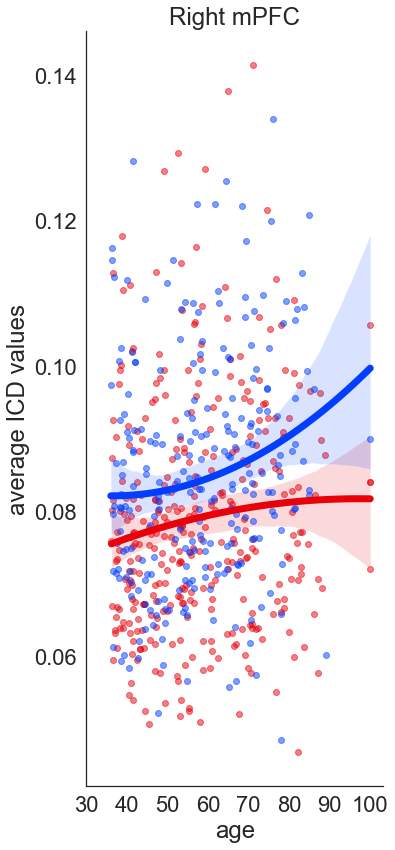

In [16]:
for i in interest_ROIs:
    conn_vs_age_quad_plot(master_data_avg_icd, i, "avg", "icd")

### G. Get linear regression correlation info AND quadratic regression correlation info (R^2 values) for each gender in each ROI

In [17]:
# create empty dataframe to store all linear and quadratic fits
lin_quad_fits_icd = pd.DataFrame(columns = ['ROI_name', 'ROI_number', 
                                            'linear_R_F', 'linear_p_F','linear_R_M', 'linear_p_M', 
                                            'quadratic_R2_F', 'quadratic_R2_M'])

# fill dataframe with linear r, quadratic r^2, and corresponding p values (for both linear and quadratic r's) for all ROIs
for i in range(len(interest_ROIs)):
    lin_quad_fits_icd = lin_quad_fits_icd.append(get_lin_quad_data(master_data_avg_icd, interest_ROIs[i], interest_ROI_nums[i], "avg", "icd"), ignore_index = True)

print(lin_quad_fits_icd)



     ROI_name ROI_number  linear_R_F  linear_p_F  linear_R_M  linear_p_M  \
0    Left PCC         20    0.137991    0.010176    0.186548    0.003128   
1   Right PCC         17    0.053287    0.323004    0.149391    0.018337   
2     Left AG         21   -0.092777    0.084847    0.041480    0.514706   
3    Right AG         18   -0.065074    0.227301    0.030436    0.632671   
4    Left PHG          5    0.030377    0.573340   -0.058063    0.361570   
5   Right PHG          6   -0.121930    0.023312   -0.066134    0.298586   
6   Left mPFC         11    0.026363    0.625061    0.090614    0.153984   
7  Right mPFC         10    0.111360    0.038418    0.178367    0.004756   

   quadratic_R2_F  quadratic_R2_M  
0        0.024215        0.034849  
1        0.007776        0.022472  
2        0.008662        0.002034  
3        0.004450        0.008377  
4        0.002373        0.006064  
5        0.016698        0.006758  
6        0.000799        0.009784  
7        0.013028        0.

### H. Generate boxplots with p-value annotations/mean trend lines

In [18]:
master_data_avg_icd = master_data_avg_icd[master_data_avg_icd["age"] <= 90]
master_data_avg_icd["age groups"] = pd.cut(master_data_avg_icd["age"], bins = range(30, 101, 10))

gender_list = sorted(master_data_avg_icd['gender'].unique())
age_group_list = sorted(master_data_avg_icd['age groups'].unique())

L_PCC_box_pairs=[((age_group_list[0], gender_list[0]), (age_group_list[0], gender_list[1])),
                 ((age_group_list[1], gender_list[0]), (age_group_list[1], gender_list[1])),
                 ((age_group_list[2], gender_list[0]), (age_group_list[2], gender_list[1])),
                 ((age_group_list[4], gender_list[0]), (age_group_list[4], gender_list[1]))]

R_PCC_box_pairs=[((age_group_list[0], gender_list[0]), (age_group_list[0], gender_list[1])),
                 ((age_group_list[1], gender_list[0]), (age_group_list[1], gender_list[1])),
                 ((age_group_list[2], gender_list[0]), (age_group_list[2], gender_list[1])),
                 ((age_group_list[4], gender_list[0]), (age_group_list[4], gender_list[1]))]

L_AngGyr_box_pairs=[((age_group_list[0], gender_list[0]), (age_group_list[0], gender_list[1])),
                    ((age_group_list[1], gender_list[0]), (age_group_list[1], gender_list[1])),
                    ((age_group_list[2], gender_list[0]), (age_group_list[2], gender_list[1])),
                    ((age_group_list[4], gender_list[0]), (age_group_list[4], gender_list[1])),]

R_AngGyr_box_pairs=[((age_group_list[0], gender_list[0]), (age_group_list[0], gender_list[1])),
                    ((age_group_list[1], gender_list[0]), (age_group_list[1], gender_list[1])),
                    ((age_group_list[2], gender_list[0]), (age_group_list[2], gender_list[1])),
                    ((age_group_list[3], gender_list[0]), (age_group_list[3], gender_list[1])),
                    ((age_group_list[4], gender_list[0]), (age_group_list[4], gender_list[1]))]

L_Frontal_box_pairs=[((age_group_list[1], gender_list[0]), (age_group_list[1], gender_list[1])),
                     ((age_group_list[2], gender_list[0]), (age_group_list[2], gender_list[1])),
                     ((age_group_list[3], gender_list[0]), (age_group_list[3], gender_list[1])),
                     ((age_group_list[5], gender_list[0]), (age_group_list[5], gender_list[1]))]

R_Frontal_box_pairs=[((age_group_list[3], gender_list[0]), (age_group_list[3], gender_list[1])),
                     ((age_group_list[5], gender_list[0]), (age_group_list[5], gender_list[1]))]

L_PHG_box_pairs=[((age_group_list[0], gender_list[0]), (age_group_list[0], gender_list[1])),
                      ((age_group_list[1], gender_list[0]), (age_group_list[1], gender_list[1])),
                      ((age_group_list[2], gender_list[0]), (age_group_list[2], gender_list[1])),
                      ((age_group_list[3], gender_list[0]), (age_group_list[3], gender_list[1])),
                      ((age_group_list[4], gender_list[0]), (age_group_list[4], gender_list[1])),
                      ((age_group_list[5], gender_list[0]), (age_group_list[5], gender_list[1]))]

R_PHG_box_pairs=[((age_group_list[0], gender_list[0]), (age_group_list[0], gender_list[1])),
                      ((age_group_list[1], gender_list[0]), (age_group_list[1], gender_list[1])),
                      ((age_group_list[2], gender_list[0]), (age_group_list[2], gender_list[1])),
                      ((age_group_list[3], gender_list[0]), (age_group_list[3], gender_list[1])),
                      ((age_group_list[4], gender_list[0]), (age_group_list[4], gender_list[1]))]

all_box_pairs = [L_PCC_box_pairs, R_PCC_box_pairs, 
                 L_AngGyr_box_pairs, R_AngGyr_box_pairs,
                 L_PHG_box_pairs, R_PHG_box_pairs,
                 L_Frontal_box_pairs, R_Frontal_box_pairs]

### I. Finalize boxplot figure arrangement for paper (supplemental avg ICD boxplot figure)

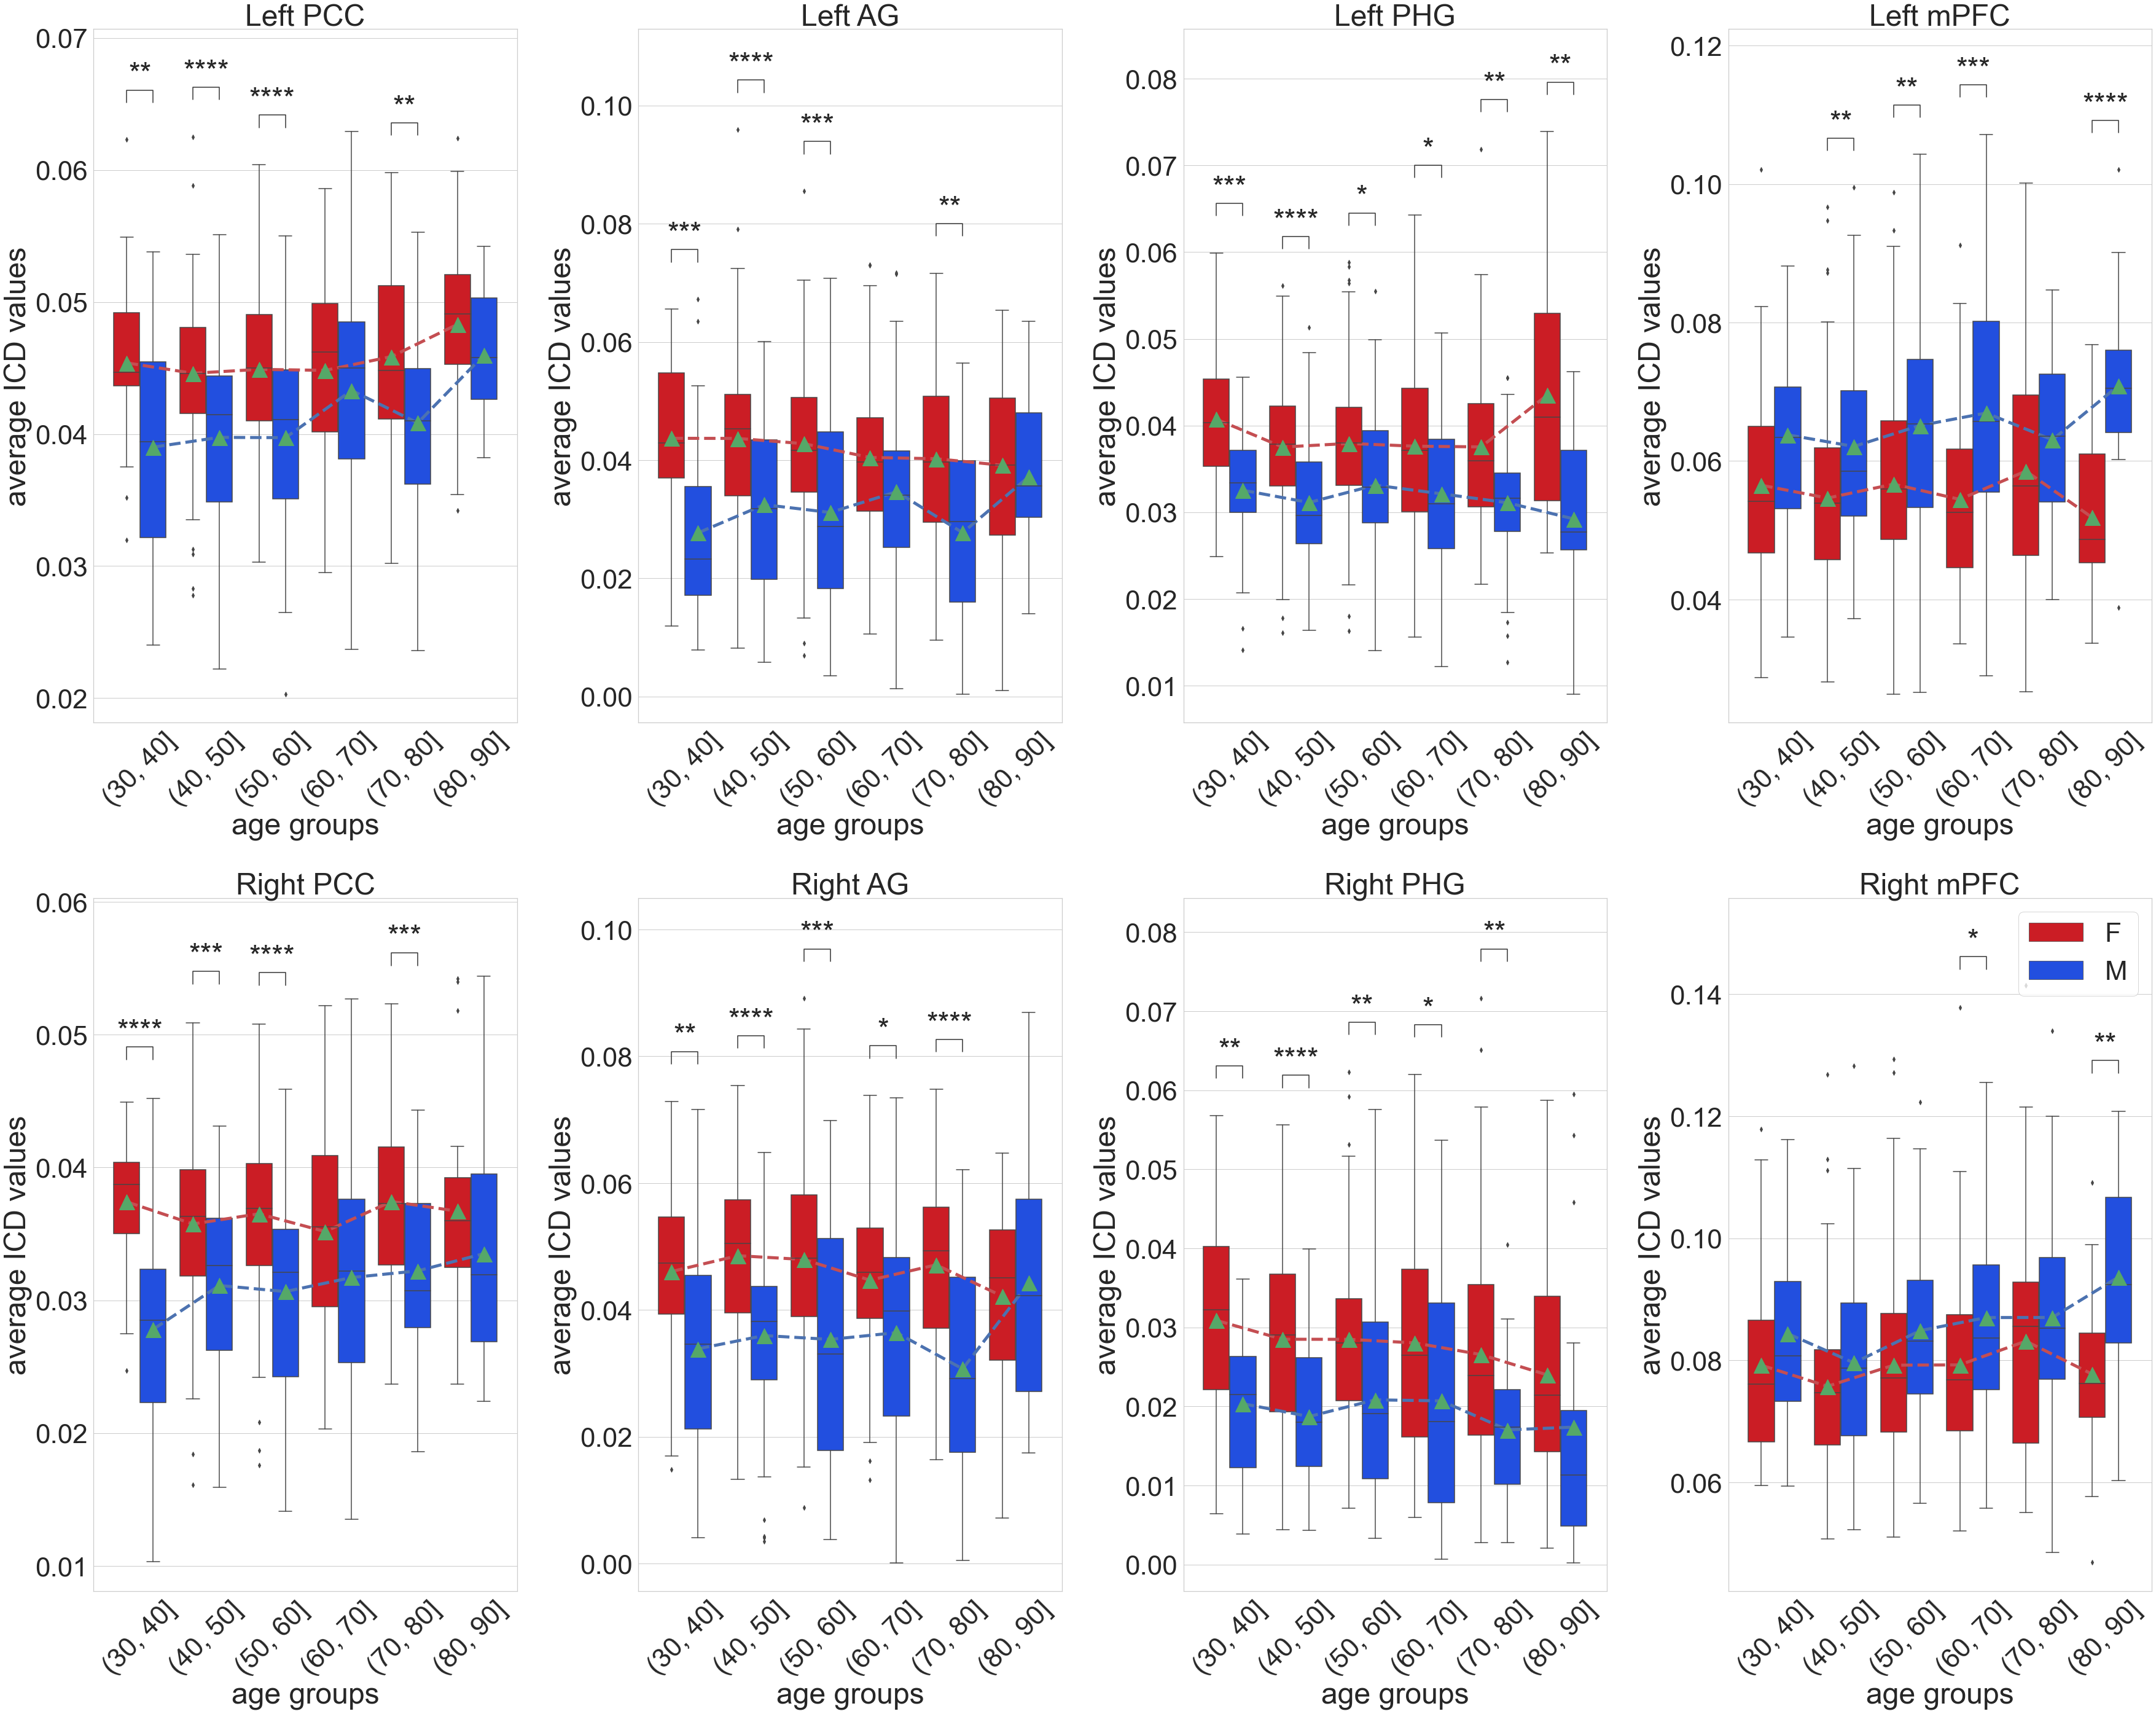

In [19]:
sns.set(font_scale = 4)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = [50,40])

for i in range(4):
    n = 241
    plt.subplot((n+i))
    conn_vs_age_boxplot(master_data_avg_icd, interest_ROIs[2*i], "icd", all_box_pairs[2*i])
    plt.subplot((n+i+4))
    conn_vs_age_boxplot(master_data_avg_icd, interest_ROIs[2*i+1], "icd", all_box_pairs[2*i+1])

plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig("figures/supp_icd_all_boxplots.png")

### J. Finalize boxplot figure arrangement for paper (main avg ICD boxplot figure)

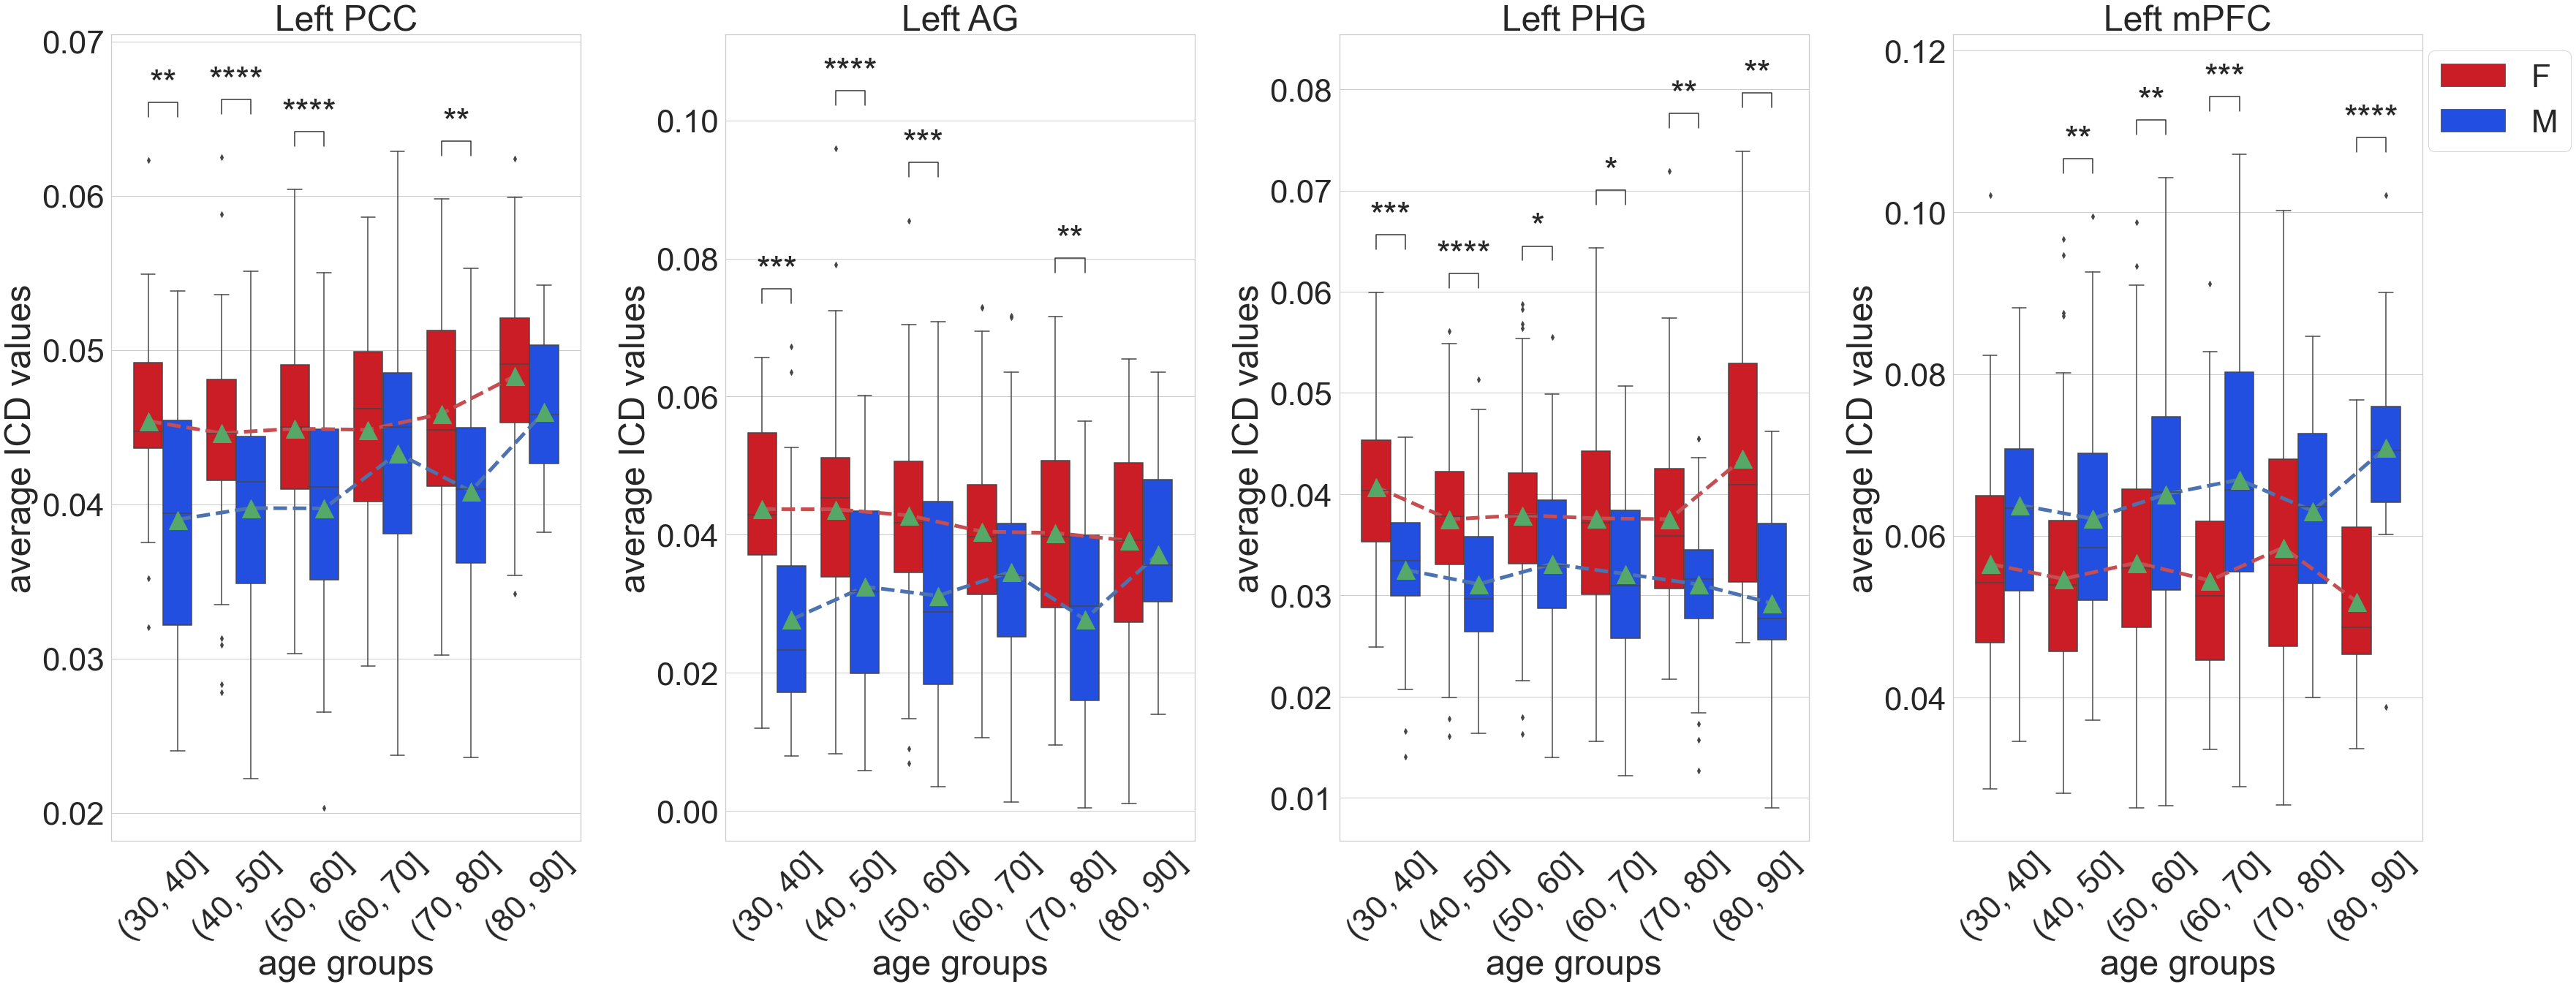

In [20]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = [50,20])

for i in range(4):
    n = 141
    plt.subplot((n+i))
    conn_vs_age_boxplot(master_data_avg_icd, interest_ROIs[2*i], "icd", all_box_pairs[2*i])

plt.legend(loc='upper right', bbox_to_anchor=(1.35,1))

plt.tight_layout()
plt.savefig("figures/fig4_main_icd_all_boxplots.png")

In [22]:
master_data_avg_icd.head(10)

,subj_id,gender,age,Left PCC,Right PCC,Left AG,Right AG,Left PHG,Right PHG,Left mPFC,Right mPFC,age groups
0,HCA6030645,F,45.333333,0.0476,0.0272,0.0434,0.0418,0.0387,0.0556,0.0607,0.0754,"(40, 50]"
1,HCA6031344,F,80.583333,0.0518,0.0398,0.0393,0.0321,0.0318,0.0180,0.0420,0.0828,"(80, 90]"
2,HCA6037457,F,73.333333,0.0473,0.0410,0.0095,0.0220,0.0248,0.0318,0.0582,0.0625,"(70, 80]"
3,HCA6051047,F,60.416667,0.0501,0.0422,0.0567,0.0638,0.0473,0.0241,0.0600,0.0913,"(60, 70]"
4,HCA6053758,F,36.416667,0.0438,0.0359,0.0370,0.0393,0.0382,0.0314,0.0371,0.0802,"(30, 40]"
5,HCA6054457,M,62.500000,0.0349,0.0287,0.0454,0.0565,0.0288,0.0176,0.0470,0.0728,"(60, 70]"
6,HCA6075263,M,63.916667,0.0469,0.0395,0.0429,0.0557,0.0232,0.0067,0.0554,0.0715,"(60, 70]"
7,HCA6086369,M,75.833333,0.0386,0.0280,0.0042,0.0061,0.0286,0.0136,0.0735,0.0800,"(70, 80]"
8,HCA6086470,F,40.416667,0.0476,0.0437,0.0489,0.0582,0.0403,0.0221,0.0371,0.0547,"(40, 50]"
9,HCA6091766,M,72.333333,0.0322,0.0298,0.0344,0.0406,0.0384,0.0202,0.0802,0.0910,"(70, 80]"


### K. Perform t-test between women and men by decade and collect t scores and p values (performed without Bonferroni correction!)

In [ ]:
ttest_icd = pd.DataFrame(columns = ['age groups', 'ROI', 't value', 'p value'])

for i in interest_ROIs:
    ttest_icd = ttest_icd.append(ttest_age(master_data_avg_icd, i, "icd"))

# write all age groups and t-test values (stored in ttest_icd dataframe) into a .txt file
ttest_icd.to_csv('data/ttest_icd.txt')

### L. Generate heatmap of gender difference across ROI (still using t-score, but using monochrome color palette)

In [ ]:
ttest_icd_new = ttest_icd[ttest_icd["age groups"] != "90-100"].pivot("ROI", "age groups", "t value")
ttest_icd_new = ttest_icd_new.reindex(index = interest_ROIs)
ttest_icd_new_absVal = ttest_icd_new

# save values from ttest_icd_new as array to manually assign heatmap annotations
heatmap_annot_val = ttest_icd_new.to_numpy()

ttest_icd_new_absVal = abs(ttest_icd_new_absVal)
print(ttest_icd_new_absVal)

sns.set(rc={"figure.figsize":(30,10)})
sns.set(font_scale = 2)
ax = sns.heatmap(ttest_icd_new_absVal, cmap = 'Purples', linewidth = 0.1, annot = heatmap_annot_val)
plt.savefig("figures/fig3_heatmap_ROIvsAge_tscores_monochrome.png")